# Sentiment Analysis of Element Coffee Shop Reviews

## Executive Summary:

Element Coffee requested an analysis on the reviews for their brick and mortar coffee shop in Northfields London. Data was Extracted using Google Cloud and the Google My Business API. Nlp was used to classify the sentiment of reviews as either Negative or Positive. with most (91.4%) reviews scoring a 5 Star Rating. A Word Cloud of the reviews was created to display the most important words and concepts that occur in the reviews. 

## Contents:
1. **Importing modules and libraries**  
2. **Accessing Data with google Auth 2.0 Playground**  
3. **Save and Import Data to and from .csv file**  
4. **Data Cleaning**  
5. **Exploratory Data Analysis 1**
6. **NLP Sentiment-Analysis with Transformers Library**  
    6.1 Pre-Processing for NLP  
7. **Exploratory Data Analysis 2**  
8. **WordCloud Image Generation**  
    8.1 WordCloud for All Reviews  

## 1. Importing Modules and Libraries

In [1]:
import os.path
import requests
import pickle
import time

from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from transformers import pipeline
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [62]:
95/104*100

91.34615384615384

## 2. Accessing Data with google Auth 2.0 Playground:

In [92]:
# Cell missing data intentionally
headers = {'Authorization': ''}
accountId = None
locationId = None
URI = f'https://mybusiness.googleapis.com/v4/accounts/{accountId}/locations/{locationId}/reviews'


# Automate data extraction using recursive function:
def reviews_to_df(headers, accountId, locationId, df, URI):
        """Gather reviews from all pages using the GMB API

    Parameters:
    argument1 (headers): Headers for Get Request. Requires only Authorisation Token
    argument2 (accountId): A number identifying your Business Account
    argument3 (LocationId): A number identifying your business Location
    argument4 (df): A Dataframe. Begins empty.
    argument5 (URI): Unique resource identifier. This is what will be requested
    Returns: new_df
    new_df: A Dataframe Populated with all the Review data for the business location.  

   """
    r = requests.get(URI, headers=headers)
    print(f'status code: {r.status_code}')
    time.sleep(3)
    result = r.json()
    new_df = df.append(result['reviews'])
    print(f'the shape of the df is now: {new_df.shape}')
    if len(result['reviews']) != 50:
        return new_df
    else:
        nextPage = result['nextPageToken']
        URI = f'https://mybusiness.googleapis.com/v4/accounts/{accountId}/locations/{locationId}/reviews?pageToken={nextPage}'
        return reviews_to_df(headers, accountId, locationId, new_df, URI)

In [97]:
# Store Review data in an empty data frame named df _recursive
empty_df = pd.DataFrame()
df = reviews_to_df(headers, accountId, locationId, empty_df, URI)

status code: 200
the shape of the df is now: (50, 8)
status code: 200
the shape of the df is now: (100, 8)
status code: 200
the shape of the df is now: (103, 8)


In [104]:
# Remove uneccesary columns
df_recursive.drop(columns=['reviewId', 'reviewReply', 'updateTime', 'reviewer', 'name'], inplace=True)

## 3. Save and Import Data to and from .csv file

In [107]:
# df_recursive.to_csv('./recursive_review_data.csv')

In [2]:
df = pd.read_csv('recursive_review_data.csv')

## 4. Data Cleaning

In [3]:
df.columns

Index(['Unnamed: 0', 'starRating', 'comment', 'createTime'], dtype='object')

In [4]:
df.sort_values(by='createTime', axis=0, inplace=True)

In [6]:
df.shape

(103, 4)

In [7]:
df.reset_index(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 5 columns):
index         103 non-null int64
Unnamed: 0    103 non-null int64
starRating    103 non-null object
comment       78 non-null object
createTime    103 non-null object
dtypes: int64(2), object(3)
memory usage: 4.1+ KB


In [9]:
df['createTime'] = pd.to_datetime(df['createTime'])
df

,index,Unnamed: 0,starRating,comment,createTime
0,102,2,FIVE,NaN,2019-03-01 19:43:18.663000+00:00
1,101,1,FIVE,Fab quirky new addition to Northfields Avenue....,2019-03-01 19:46:48.012000+00:00
2,100,0,FIVE,"The coffee is made with love, the food is yumm...",2019-03-01 20:58:52.038000+00:00
3,99,49,FIVE,NaN,2019-03-02 11:14:14.423000+00:00
4,98,48,FIVE,Incredibly cosy and frieindly atmosphere with ...,2019-03-02 14:04:06.497000+00:00
...,...,...,...,...,...
98,4,4,FIVE,Absolutely love this place! The staff is great...,2020-08-16 11:12:35.362000+00:00
99,3,3,FIVE,Staff are some of the most interesting and fri...,2020-08-17 18:23:04.249000+00:00
100,2,2,FIVE,Lovely place to relax and have a coffee. They ...,2020-08-20 07:42:04.657000+00:00
101,1,1,FIVE,Really good coffee. Very passionate about what...,2020-09-10 21:06:15.054000+00:00


In [10]:
df.drop(columns=['index', 'Unnamed: 0'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 3 columns):
starRating    103 non-null object
comment       78 non-null object
createTime    103 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 2.5+ KB


## 5. Exploratory Data Analysis

In [12]:
#Review Ratings with no comments:
df_sub = df.where(df.comment.isnull())

In [13]:
df_sub.dropna(how='all', inplace=True)

Text(0, 0.5, 'Counts')

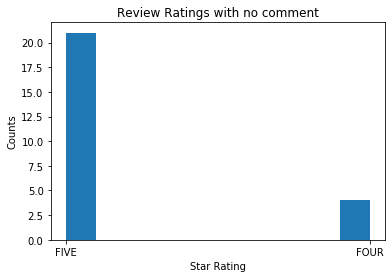

In [14]:
# Analysis of ratings with no comments
plt.hist(df_sub.starRating)
plt.title('Review Ratings with no comment')
plt.xlabel('Star Rating')
plt.ylabel('Counts')

## 6. NLP Sentiment-Analysis with Transformers Library

### 6.1 Preprocessing for nlp

In [15]:
reviews = df.comment

In [16]:
reviews.dropna(inplace=True)

In [17]:
reviews = list(reviews)
reviews

["Fab quirky new addition to Northfields Avenue.Good selection of lovely Origin coffees,inventive sandwiches and stuffed brioche buns .. particularly enjoyed the breakfast brioche with  bacon,goats cheese and sweet salty maple butter...the best Red Velvet cake.There's a really nice relaxed vibe...a great place to hang out...",
 'The coffee is made with love, the food is yummy and the vibes are relaxing. You’ll leave a happier person.',
 "Incredibly cosy and frieindly atmosphere with the best coffee and cakes I've had! Definitely my new favourite place to go",
 'Great coffee, and the red velvet cake was quickly devoured by myself and the missus. Will be back very soon',
 'Great coffee. Excellent service, went during their opening and they were raising money for Mind. Overall nice vibe would visit again.',
 "Cozy with delicious food!  Tried the charcoal bun salami and truffler cheese and salad.  Staff are friendly and service is fast.  I loved the Pathfinder blend coffee, and the cheese 

In [33]:
# remove reviews with no comments
df.drop(df_sub.index, inplace=True)

In [18]:
classifier = pipeline("sentiment-analysis")

In [19]:
results = classifier(reviews)

In [20]:
# review_labels # maybe make these dict? to be able to make a df out of it?
nlp_results_df = pd.DataFrame(results)

In [35]:
# the shapes must match rows
print(f'shape of dataframe:{df.shape}. Shape of the nlp results frame:{nlp_results_df.shape}')

shape of dataframe:(78, 3). Shape of the nlp results frame:(78, 2)


In [36]:
nlp_results_df.reset_index(inplace=True)

In [37]:
df.reset_index(inplace=True)

In [38]:
nlp_results_df.drop(columns='index', inplace=True)

In [39]:
final_df = df.join(nlp_results_df)

In [41]:
final_df.drop(columns='index', inplace=True)

In [42]:
final_df

,starRating,comment,createTime,label,score
0,FIVE,Fab quirky new addition to Northfields Avenue....,2019-03-01 19:46:48.012000+00:00,POSITIVE,0.999850
1,FIVE,"The coffee is made with love, the food is yumm...",2019-03-01 20:58:52.038000+00:00,POSITIVE,0.999840
2,FIVE,Incredibly cosy and frieindly atmosphere with ...,2019-03-02 14:04:06.497000+00:00,POSITIVE,0.999793
3,FIVE,"Great coffee, and the red velvet cake was quic...",2019-03-02 15:44:56.985000+00:00,POSITIVE,0.996087
4,FIVE,"Great coffee. Excellent service, went during t...",2019-03-02 15:58:31.612000+00:00,POSITIVE,0.999741
...,...,...,...,...,...
73,FIVE,Absolutely love this place! The staff is great...,2020-08-16 11:12:35.362000+00:00,POSITIVE,0.999882
74,FIVE,Staff are some of the most interesting and fri...,2020-08-17 18:23:04.249000+00:00,POSITIVE,0.999870
75,FIVE,Lovely place to relax and have a coffee. They ...,2020-08-20 07:42:04.657000+00:00,POSITIVE,0.999735
76,FIVE,Really good coffee. Very passionate about what...,2020-09-10 21:06:15.054000+00:00,POSITIVE,0.999881


## 7. Exploratory Data Analysis 2

In [43]:
final_df.loc[final_df['label'] == 'NEGATIVE']

,starRating,comment,createTime,label,score
31,ONE,Awful coffee and rude staff. Never again,2019-06-26 13:52:08.966000+00:00,NEGATIVE,0.999407
42,FIVE,"Just great, but tiny, so please don't tell anyone",2019-08-15 23:14:29.480000+00:00,NEGATIVE,0.590078
68,ONE,"The worst, most overpriced coffee in Ealing.",2020-03-04 09:06:30.695000+00:00,NEGATIVE,0.999781
77,FIVE,Fantastic coffee but been closed since covid. ...,2020-09-13 19:30:58.215000+00:00,NEGATIVE,0.826600


(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., 76.]),
 array([0.59007847, 0.63105941, 0.67204036, 0.7130213 , 0.75400224,
        0.79498318, 0.83596412, 0.87694506, 0.917926  , 0.95890694,
        0.99988788]),
 <a list of 10 Patch objects>)

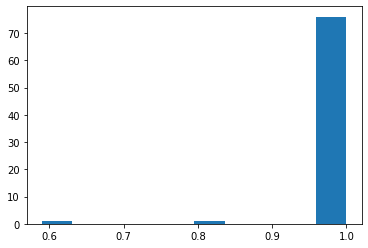

In [45]:
plt.hist(final_df['score'])

<function matplotlib.pyplot.title(label, fontdict=None, loc='center', pad=None, **kwargs)>

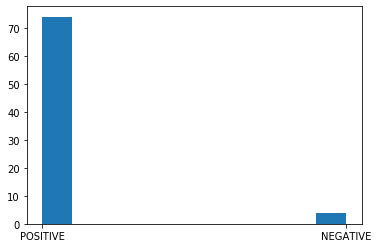

In [46]:
plt.hist(final_df['label'])
plt.title

(array([73.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  2.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

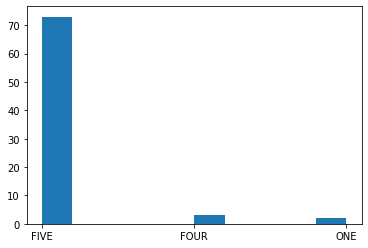

In [47]:
plt.hist(final_df['starRating'])


C:\Users\kamik\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Review Score')

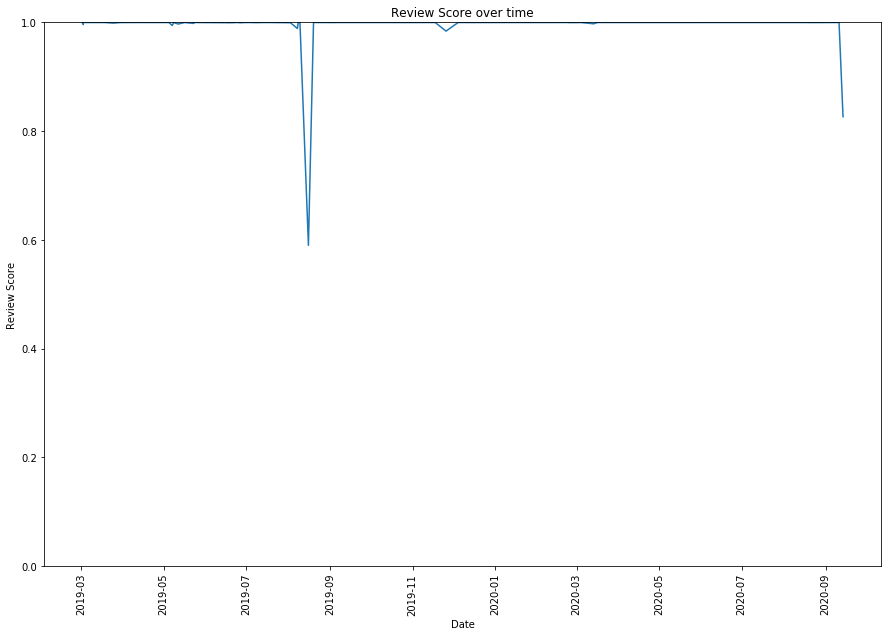

In [48]:
# Plot Review score against date
plt.figure(figsize=(15,10))
plt.plot(final_df['createTime'], final_df['score'])
plt.title('Review Score over time')
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.xlabel("Date")
plt.ylabel("Review Score")

Text(0, 0.5, 'Sentiment Label')

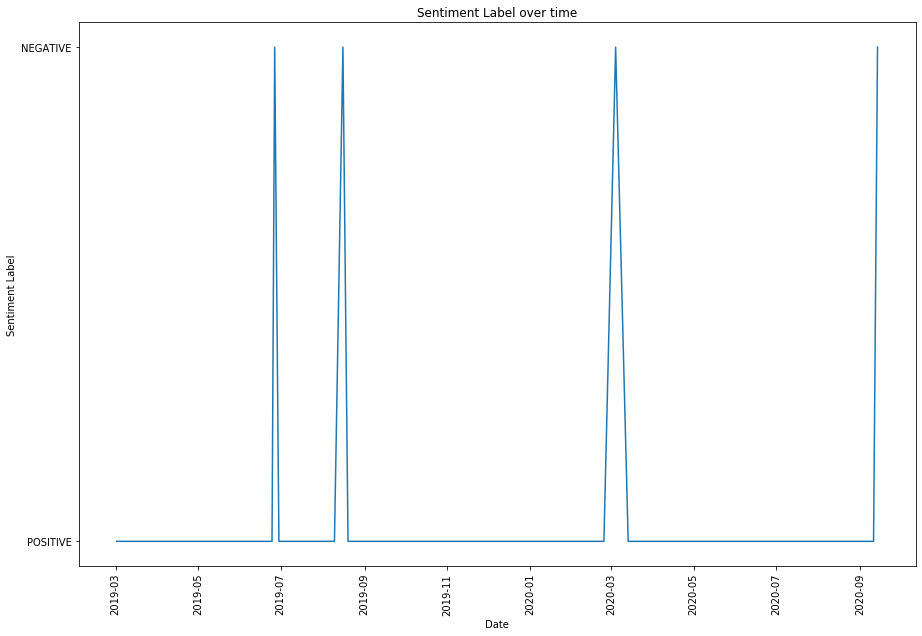

In [49]:
# Plot label against date
plt.figure(figsize=(15,10))
plt.plot(final_df['createTime'], final_df['label'])
plt.title('Sentiment Label over time')
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Sentiment Label")

In [50]:
np.mean(final_df['score'].where(final_df['label']=='POSITIVE'))

0.9992354302792936

In [51]:
np.mean(final_df['score'].where(final_df['label']=='NEGATIVE'))

0.8539668023586273

In [52]:
df['starRating'].value_counts()

FIVE    73
FOUR     3
ONE      2
Name: starRating, dtype: int64

## 8.  WordCloud Image Generation

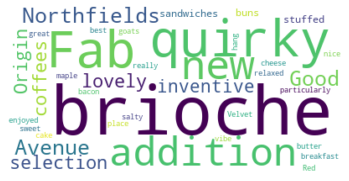

In [56]:
# Start with one review:
text = final_df.comment[0]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [247]:
# save file as png
wordcloud.to_file("img/first_review.png")

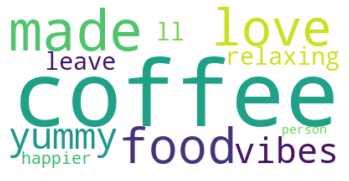

In [57]:
# take second review for example purposes:
text = final_df.comment[1]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [249]:
wordcloud.to_file("img/second_review.png")

### 8.1  World Cloud for All reviews

In [58]:
text = " ".join(review for review in final_df.comment)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 10115 words in the combination of all review.


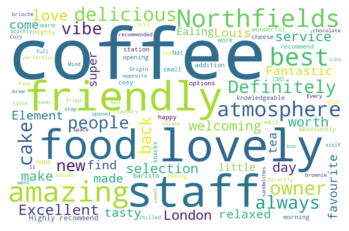

In [60]:
# First selection of Stopwords
stopwords = set(STOPWORDS)
stopwords.update(["want", "nice", "go", "will", "shop", "drink", "now", "cafe", "great", "place", "good", "really"])

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white", width=1080, height = 720).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear", aspect='auto')
plt.axis("off")
plt.show()

In [280]:
wordcloud.to_file("img/all_reviews_adjusted.png")

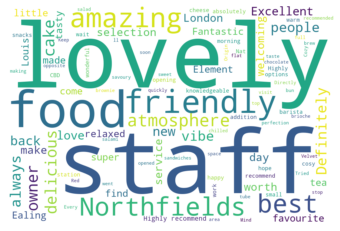

In [59]:
# Second selection of Stopwords (removing coffee)
stopwords = set(STOPWORDS)
stopwords.update(["coffee", "want", "nice", "go", "will", "shop", "drink", "now", "cafe", "great", "place", "good", "really"])

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white",width=1080, height = 720).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [284]:
wordcloud.to_file("img/all_review_no_coffee.png")

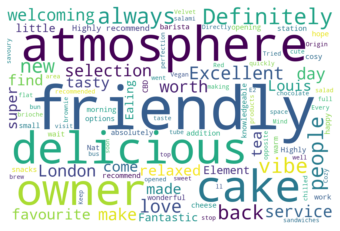

In [61]:
# Final selection of stopwords
stopwords = set(STOPWORDS)
stopwords.update(["best", "amazing", "Northfields","coffee", "food", "staff", "lovely", "want", "nice", "go", "will", "shop", "drink", "now", "cafe", "great", "place", "good", "really"])

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white", width=1080, height = 720).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [282]:
wordcloud.to_file("img/all_reviews_final.png")